In [1]:
import pandas as pd
import numpy as np

import missingno as msno
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

pd.set_option("display.max_columns", 100)
%matplotlib inline

import os

# TAD

* Edad
* Zipcode
* Percapita income by zipcode
* yearli income
* total debt
* FICO Score
* numCredit Cards
* CreditLimit

* Total de transacciones -> count
* Total de transacciones (EU, Extranjero, online) -> count
* Media de tansacciones (EU, Extranjero, online) -> mean

* (Monto máximo de transacción y sacar el porcentaje)
* Monto -> media, el total historico gastado

In [2]:
data_path = '../../data/modulo3/dataexam2/'

In [3]:
os.listdir(data_path)

['.DS_Store',
 'TAD.csv',
 'tablas_juntasf.parquet',
 'pca_examen2.pkl',
 'mds_examen2.pkl']

In [4]:
df = pd.read_csv(data_path +  'TAD.csv')

In [5]:
df.head()

Person  CurrentAge  FICOScore  RetirementAge  YearlyIncome_Person  \
0   Aaden Campbell          33        763             69              59613.0   
1   Aaliyah Martin          43        704             74              45360.0   
2     Aarav Farhad          48        673             64              27447.0   
3        Abby Wood          54        716             72              76431.0   
4  Abigail Morales          19        782             63              55854.0   

   TotalDebt  NumCreditCards  TotalAmount  AvgAmount  MaxAmount  MinAmount  \
0    36199.0               4    629403.44      74.22    1128.47       0.78   
1    14587.0               3    581856.99      40.01     937.15       0.54   
2    80850.0               5    284571.90      41.46     534.84       0.38   
3   115362.0               5    190148.65      68.74    1624.15       0.68   
4   111042.0               1      4488.90      61.49     352.14       3.54   

   TotalTransactions  USTrans  OnlineTrans  AbroadTrans  AvgUSAmount  \
0               8480     7624          710          146        63.25   
1              14544     9202         5288           54        30.59   
2               6863     6388          475            0        36.42   
3               2766     2550          123           93        58.66   
4                 73       71            2            0        58.39   

   AvgOnlineAmount  AvgAbroadAmount  MaxCreditLimit  MinCreditLimit  \
0             9.28             1.69         17600.0         17600.0   
1             9.08             0.34         12800.0         10900.0   
2             5.04             0.00          7800.0          7400.0   
3             8.70             1.39         19300.0         19300.0   
4             3.10             0.00         14600.0         14600.0   

   AvgCreditLimit  Antiquity  RemainingYears  
0        17600.00       14.0            36.0  
1        11793.04       18.0            31.0  
2         7513.65       15.0            16.0  
3        19300.00       11.0            18.0  
4        14600.00        0.0            44.0

In [6]:
df.shape

(1296, 23)

<AxesSubplot:>

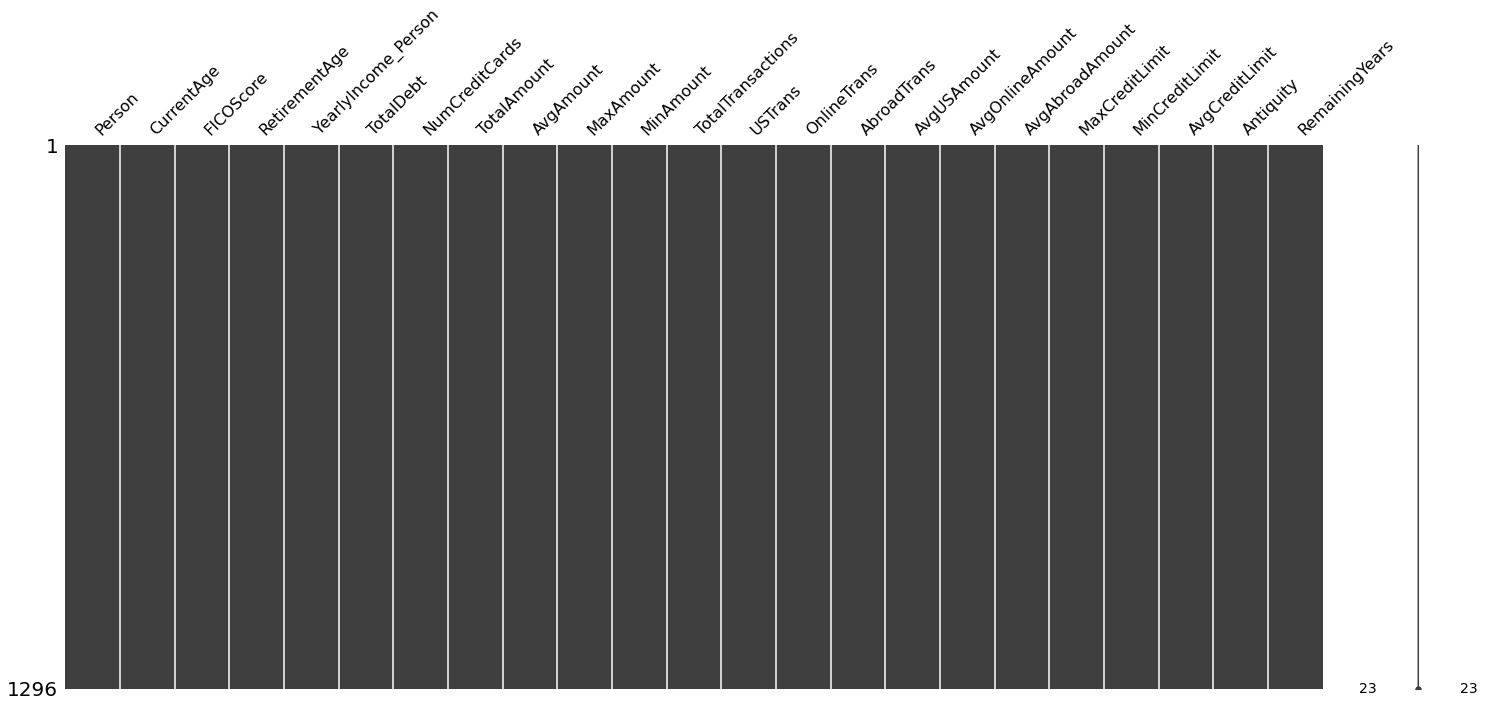

In [7]:
msno.matrix(df)

In [8]:
df.describe()

CurrentAge    FICOScore  RetirementAge  YearlyIncome_Person  \
count  1296.000000  1296.000000    1296.000000          1296.000000   
mean     47.550926   717.043981      66.547068         45386.139660   
std      18.261816    63.296498       3.399424         22666.859535   
min      18.000000   488.000000      53.000000           399.000000   
25%      33.000000   685.000000      65.000000         32622.000000   
50%      47.000000   716.000000      67.000000         40372.000000   
75%      59.000000   759.000000      69.000000         52905.000000   
max     101.000000   850.000000      79.000000        307018.000000   

           TotalDebt  NumCreditCards   TotalAmount    AvgAmount    MaxAmount  \
count    1296.000000     1296.000000  1.296000e+03  1296.000000  1296.000000   
mean    61571.995370        3.537809  3.797122e+05    67.279159  1144.650934   
std     51611.786089        1.617507  4.134901e+05    23.884426   752.707967   
min         0.000000        1.000000  1.686000e+02    12.860000    89.170000   
25%     22095.500000        2.000000  7.233510e+04    51.017500   740.665000   
50%     56037.000000        3.000000  2.930416e+05    63.560000  1051.005000   
75%     88106.750000        5.000000  5.322390e+05    80.012500  1371.042500   
max    516263.000000        9.000000  4.652207e+06   207.160000  6613.440000   

         MinAmount  TotalTransactions       USTrans   OnlineTrans  \
count  1296.000000        1296.000000   1296.000000   1296.000000   
mean      1.109213        5829.554012   5150.993056    640.552469   
std       2.031802        6215.900781   5494.686376   1248.277999   
min       0.000000           4.000000      4.000000      0.000000   
25%       0.200000        1225.500000   1113.500000     92.500000   
50%       0.500000        4586.500000   4121.000000    317.500000   
75%       1.190000        8093.750000   7250.500000    580.250000   
max      29.180000       80298.000000  63900.000000  16238.000000   

       AbroadTrans  AvgUSAmount  AvgOnlineAmount  AvgAbroadAmount  \
count  1296.000000  1296.000000      1296.000000      1296.000000   
mean     38.008488    57.594336         9.070000         0.614915   
std      63.334589    21.000972         6.292508         1.280254   
min       0.000000     8.740000         0.000000         0.000000   
25%       0.000000    42.670000         4.737500         0.000000   
50%      17.000000    54.920000         7.585000         0.290000   
75%      46.000000    68.975000        11.665000         0.760000   
max     581.000000   161.000000        50.480000        25.480000   

       MaxCreditLimit  MinCreditLimit  AvgCreditLimit    Antiquity  \
count     1296.000000     1296.000000     1296.000000  1296.000000   
mean     12454.398148    10270.138889    11543.208657    10.514660   
std       7144.481086     6450.424809     6692.194322     6.612713   
min        100.000000      100.000000      100.000000     0.000000   
25%       8300.000000     6200.000000     7600.000000     5.000000   
50%      11200.000000     9050.000000    10293.250000    12.000000   
75%      15200.000000    12900.000000    14077.117500    15.000000   
max      98100.000000    98100.000000    98100.000000    29.000000   

       RemainingYears  
count     1296.000000  
mean        20.780864  
std         15.581094  
min          0.000000  
25%          6.000000  
50%         20.000000  
75%         33.000000  
max         56.000000

In [9]:
df.columns

Index(['Person', 'CurrentAge', 'FICOScore', 'RetirementAge',
       'YearlyIncome_Person', 'TotalDebt', 'NumCreditCards', 'TotalAmount',
       'AvgAmount', 'MaxAmount', 'MinAmount', 'TotalTransactions', 'USTrans',
       'OnlineTrans', 'AbroadTrans', 'AvgUSAmount', 'AvgOnlineAmount',
       'AvgAbroadAmount', 'MaxCreditLimit', 'MinCreditLimit', 'AvgCreditLimit',
       'Antiquity', 'RemainingYears'],
      dtype='object')

In [10]:
variables1 = ['CurrentAge', 'YearlyIncome_Person', 'TotalDebt', 'TotalAmount', 'AvgAmount',
             'TotalTransactions', 'USTrans', 'OnlineTrans', 'AbroadTrans', 'AvgUSAmount', 'AvgOnlineAmount',
             'AvgAbroadAmount', 'AvgCreditLimit']

In [11]:
variables = ['CurrentAge', 'YearlyIncome_Person', 'TotalDebt', 'TotalAmount',
             'USTrans', 'OnlineTrans', 'AbroadTrans', 'AvgUSAmount', 'AvgOnlineAmount',
             'AvgAbroadAmount', 'AvgCreditLimit']

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/seaborn/axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x155aff8b0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


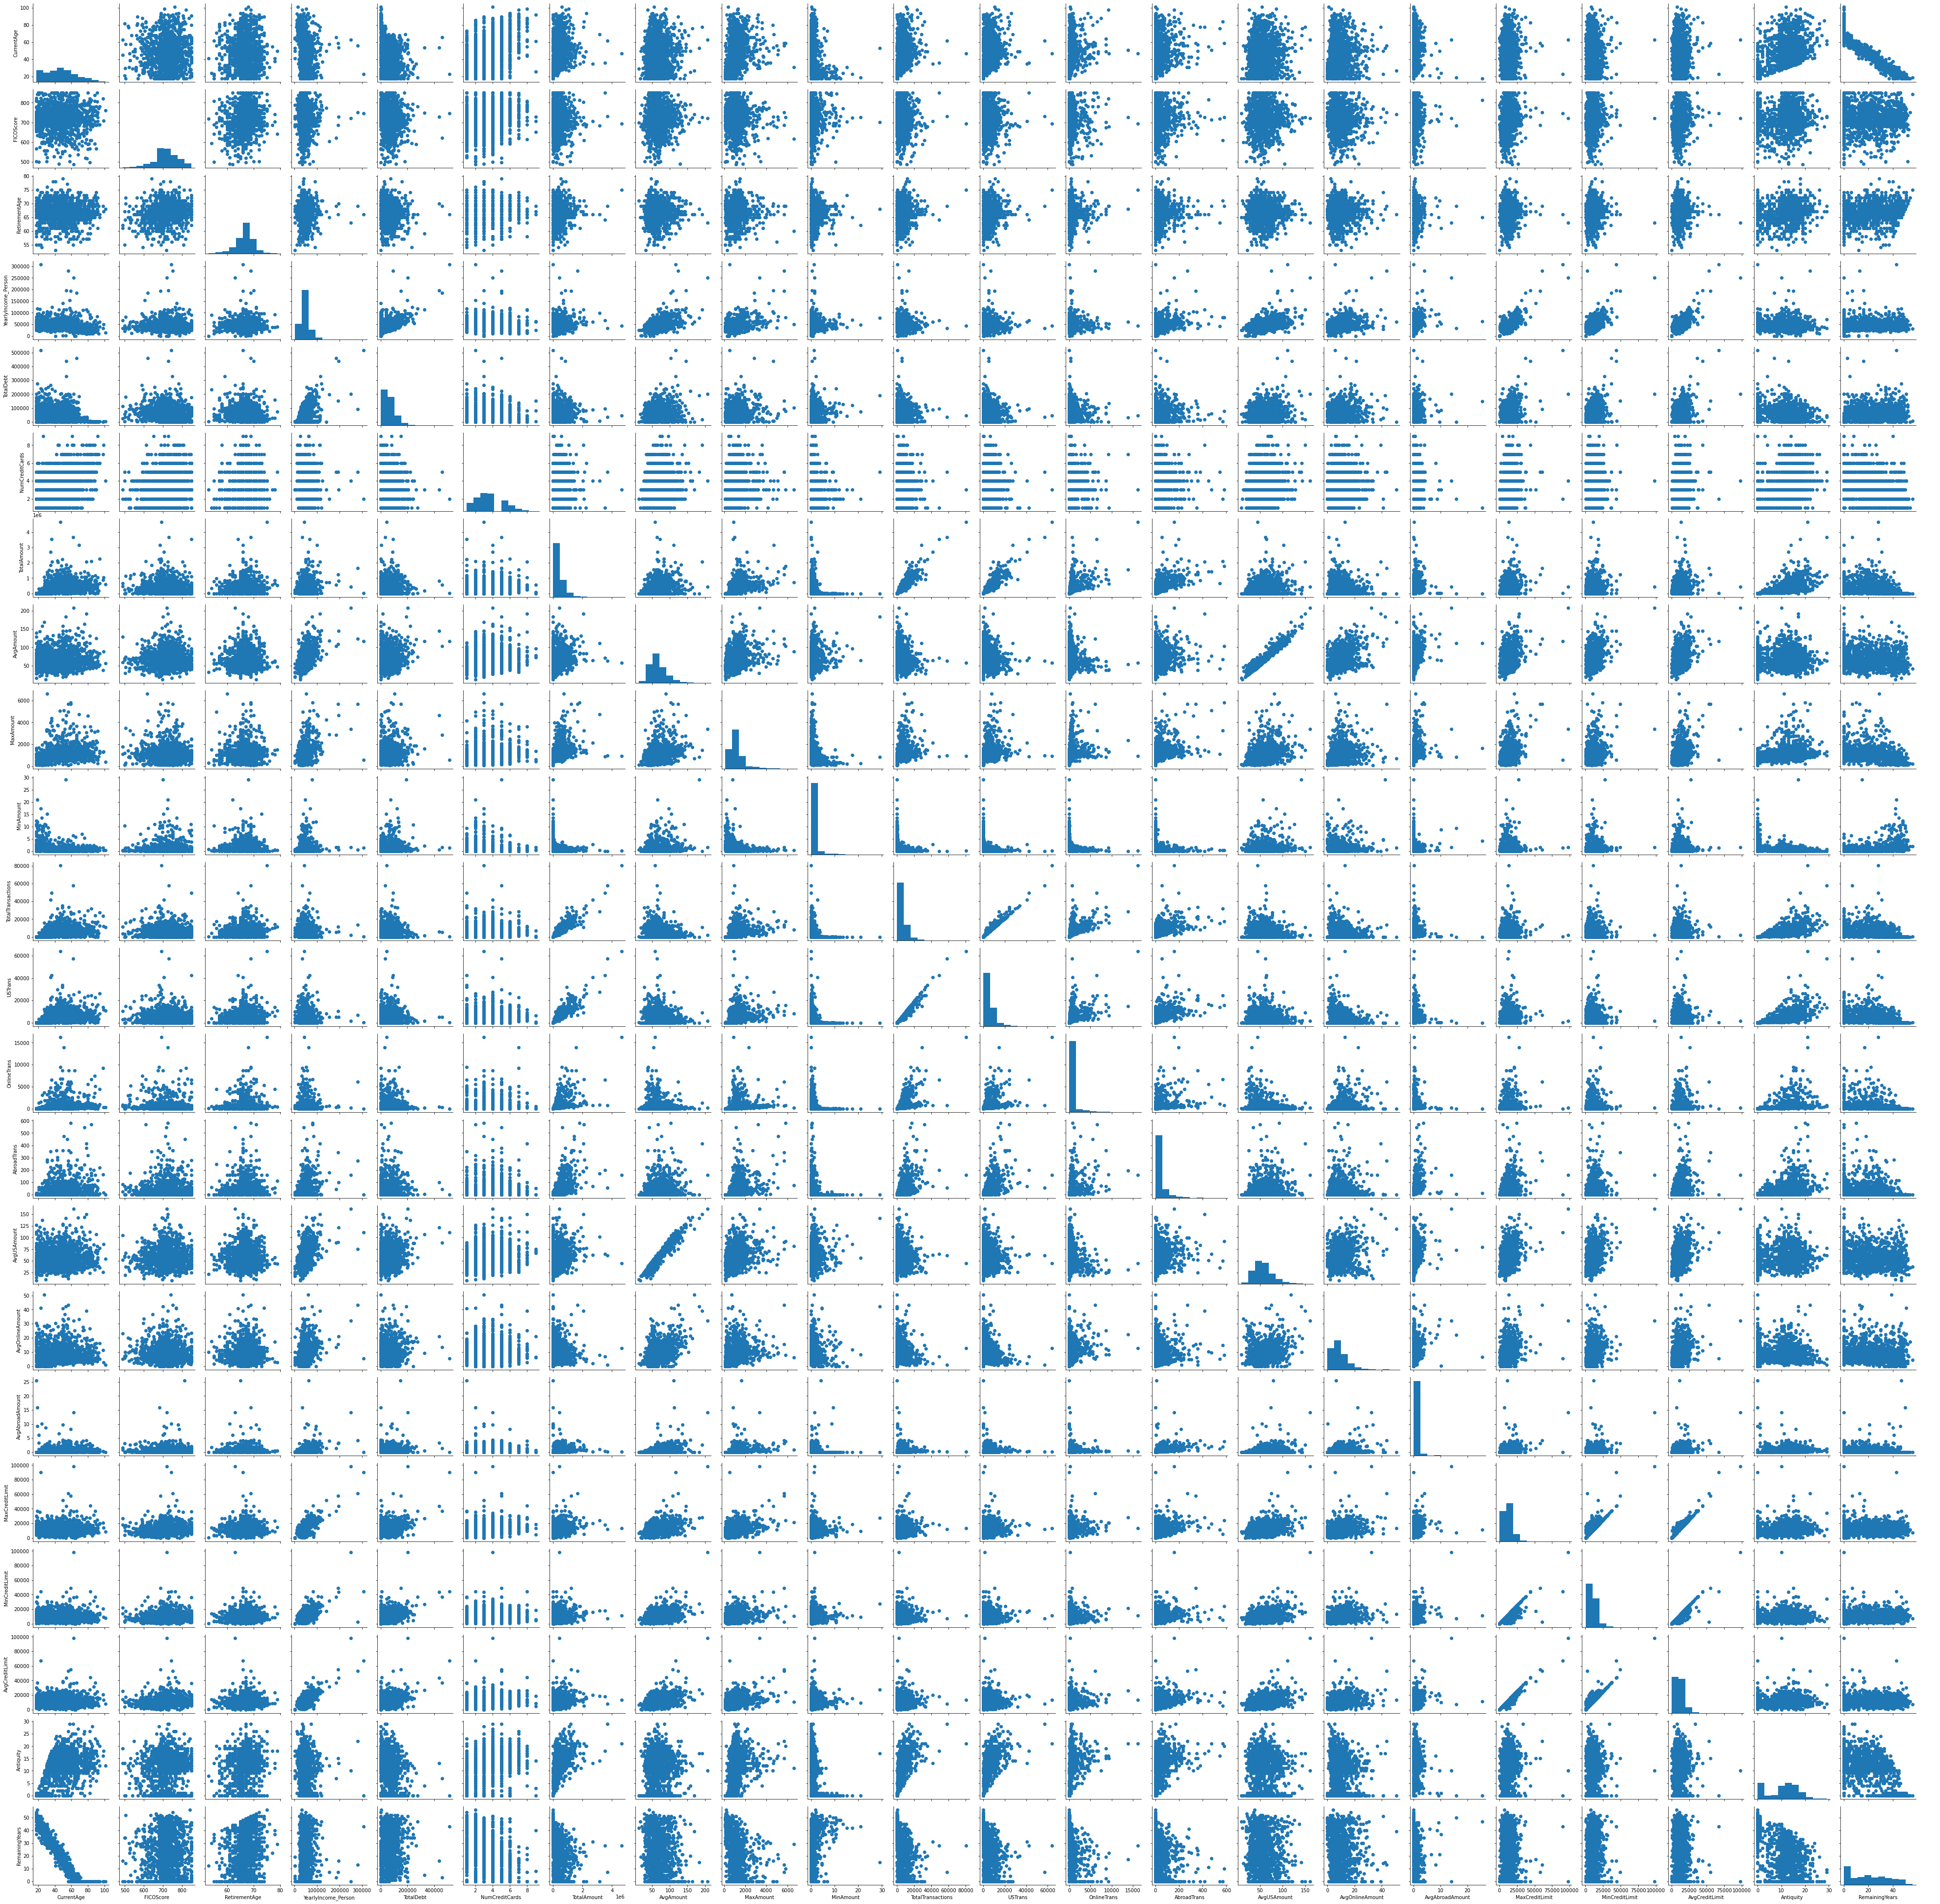

In [12]:
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

In [13]:
import sys
sys.path.insert(1, '../../script')
from dimensional_tools import DimensionalReduction
import pickle

In [14]:
rd = DimensionalReduction(df, 1)

In [15]:
rd.apply_pca?

In [16]:
df_pca, pca = rd.apply_pca(threshold=0.9,verbose=True)

INFO:
Component 1: 0.25624807392166105
Component 2: 0.20786742497860852
Component 3: 0.09974088611955113
Component 4: 0.06411018431335257
Component 5: 0.05750977760287117
Component 6: 0.04873064404034164
Component 7: 0.0421767950010279
Component 8: 0.03951453391272582
Component 9: 0.0363548825116873
Component 10: 0.029792480532283876
Component 11: 0.025015006080492883
Explained Variance: 0.9070606890146039


In [17]:
pickle.dump(pca, open(data_path + 'pca_examen2.pkl', 'wb'))

In [18]:
df_mds, mds = rd.apply_mds(dimensions=3, verbose=True)

Process took: 141.559263 time units.


In [19]:
pickle.dump(mds, open(data_path + 'mds_examen2.pkl', 'wb'))

In [20]:
df_mds.head()

d_1       d_2       d_3
0  0.378973  0.060627 -0.235804
1  0.453095 -0.398518  0.022459
2 -0.055343 -0.299143  0.124157
3 -0.087305  0.071094 -0.291481
4  0.473665  0.545190  0.390353

In [21]:
fig = px.scatter_3d(df_mds, x='d_1', y='d_2', z='d_3')
fig.show()

In [22]:
fig = px.scatter_3d(df_pca, x='p_0', y='p_1', z='p_2')
fig.show()

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/seaborn/axisgrid.py:156: UserWarning:

The handle <matplotlib.patches.Patch object at 0x169646650> has a label of '_nolegend_' which cannot be automatically added to the legend.



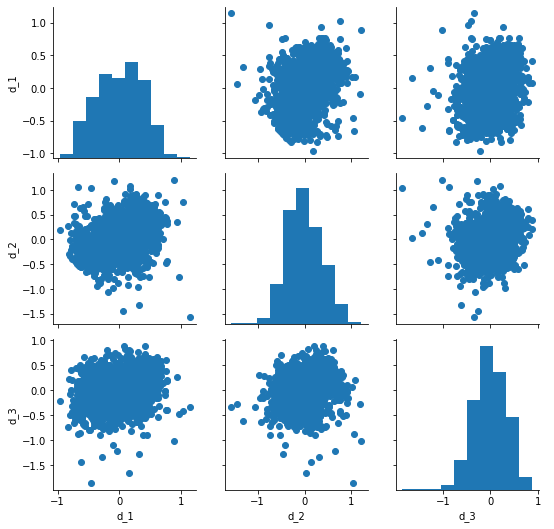

In [23]:
g = sns.PairGrid(df_mds)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/seaborn/axisgrid.py:156: UserWarning:

The handle <matplotlib.patches.Patch object at 0x16d8d3cd0> has a label of '_nolegend_' which cannot be automatically added to the legend.



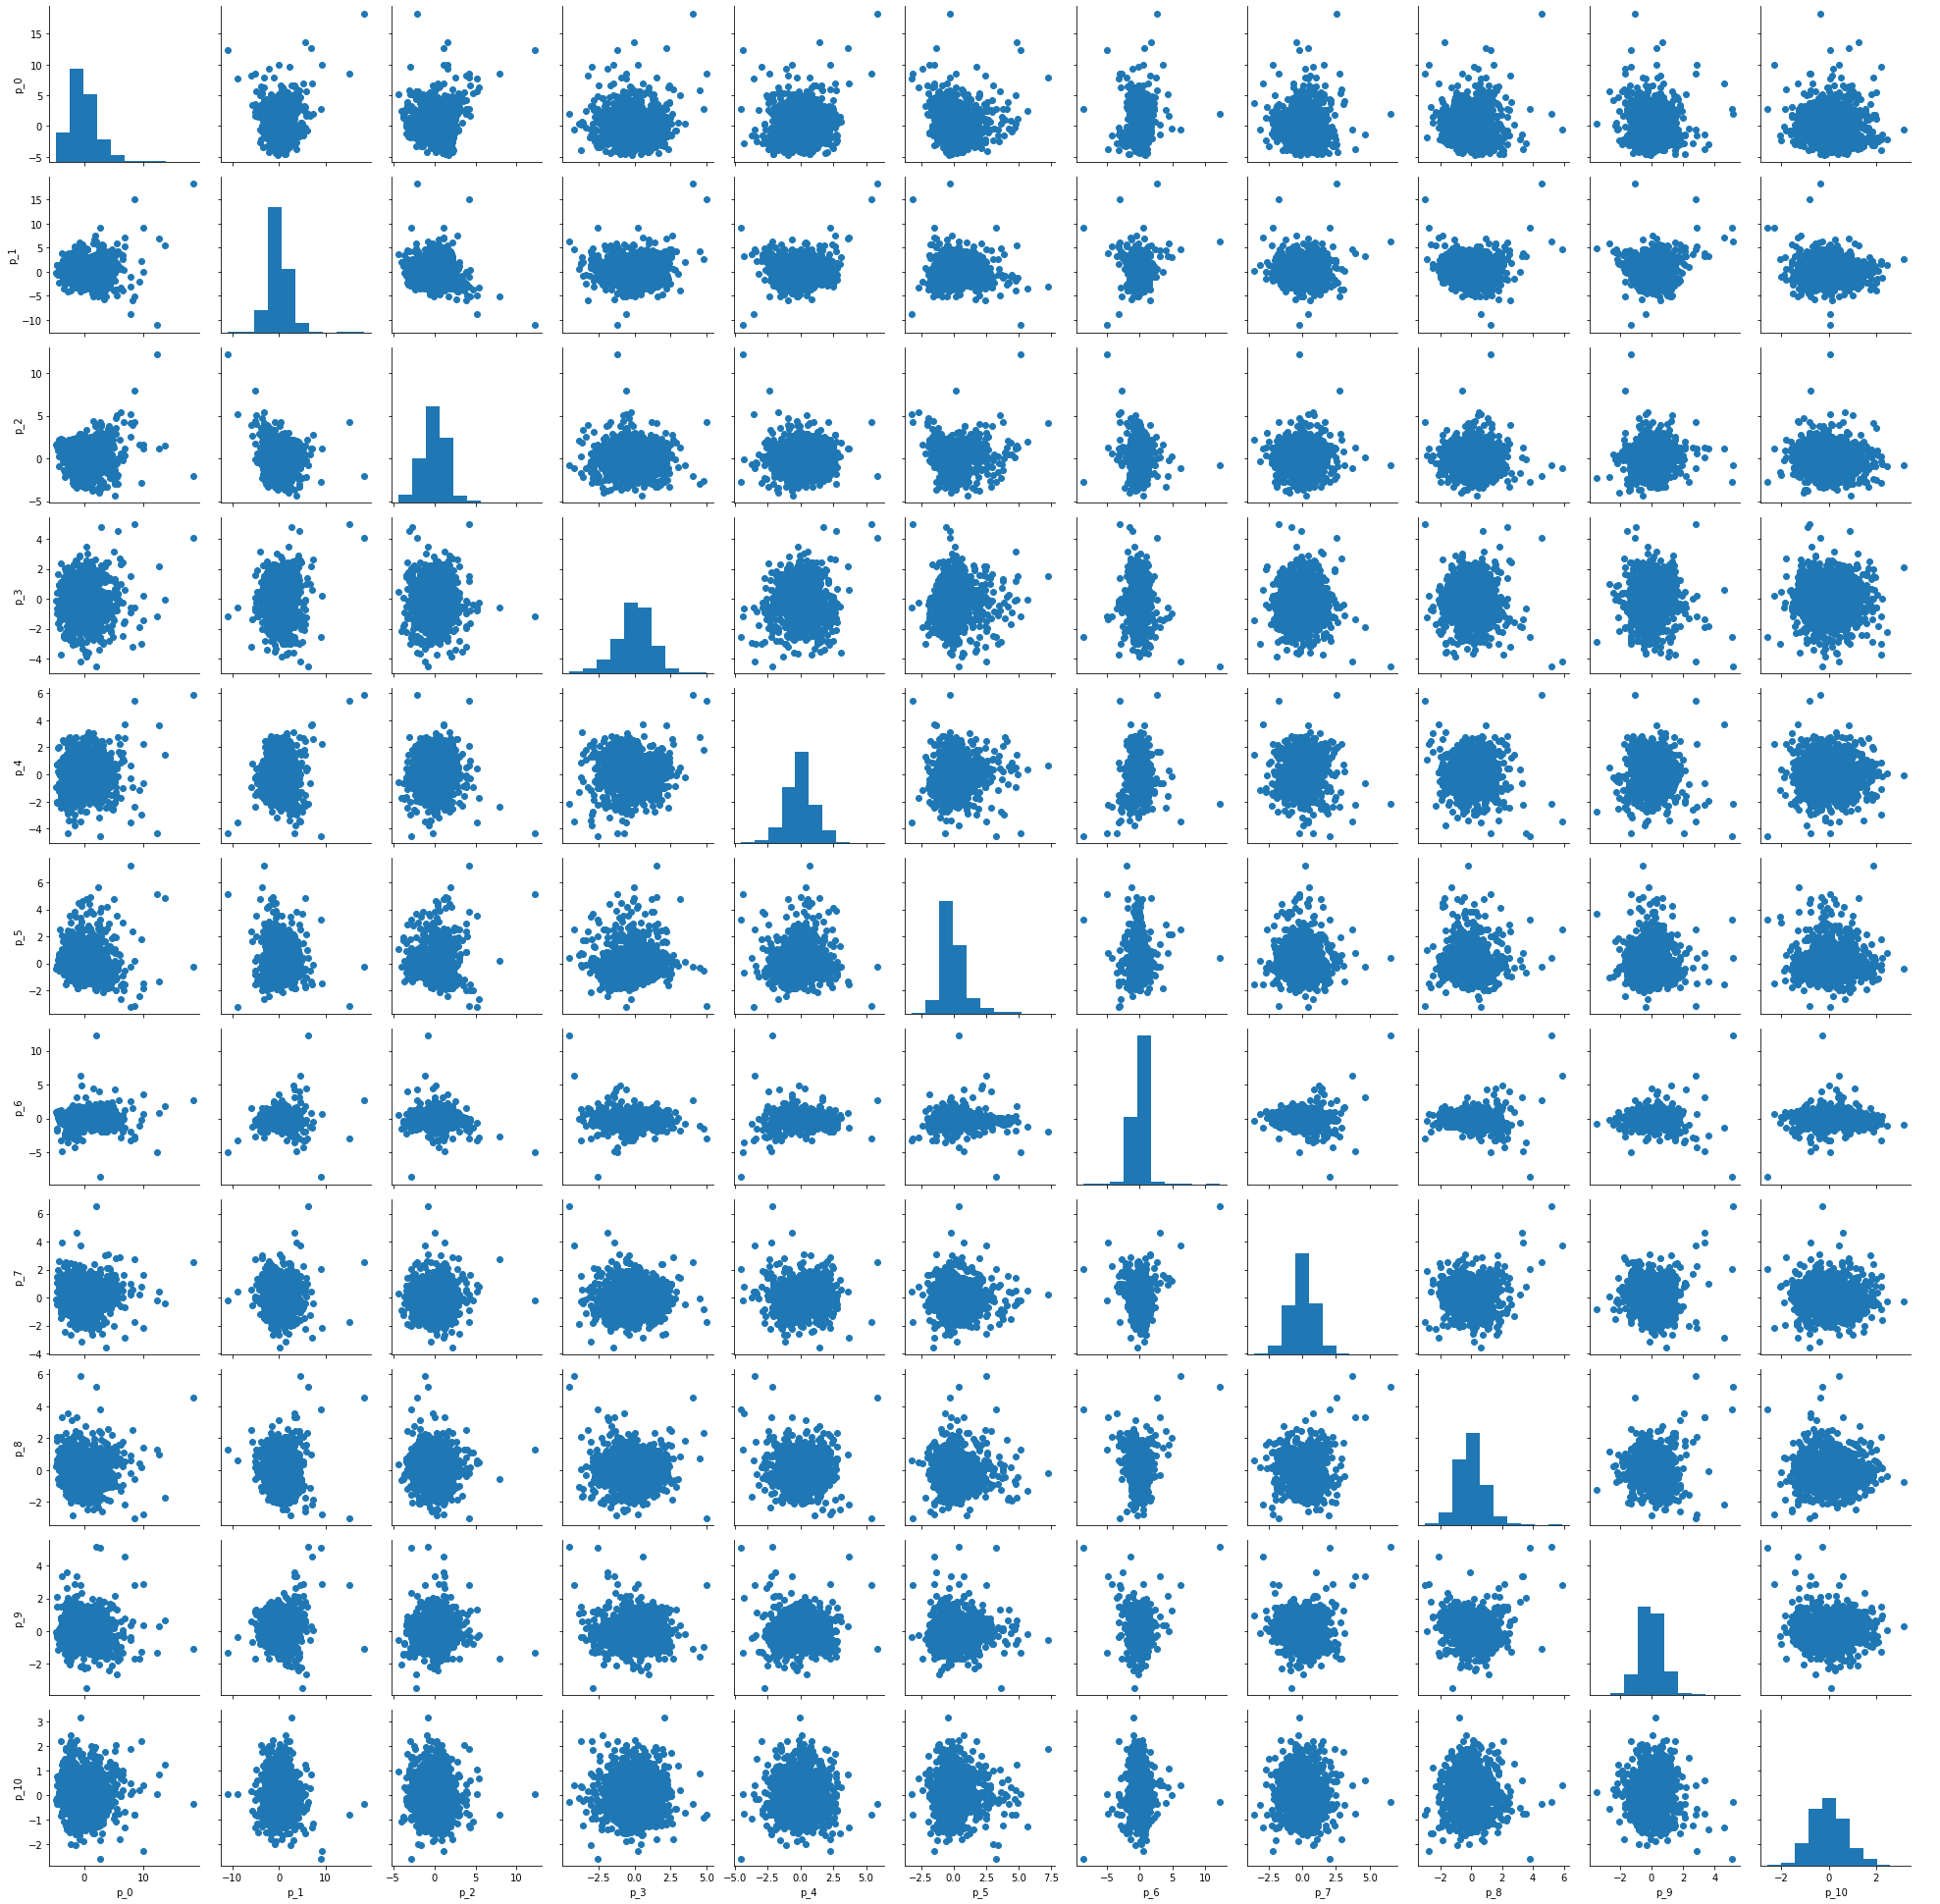

In [24]:
g = sns.PairGrid(df_pca)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

# Encontrar número de clusters